In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
medals = pd.read_csv(r'C:\Users\diego\Downloads\1896 to2008ALLMEDALISTS.csv', skiprows=(0,3), header=2)
print(medals)


          City  Edition      Sport       Discipline  \
0       Athens     1896   Aquatics         Swimming   
1       Athens     1896   Aquatics         Swimming   
2       Athens     1896   Aquatics         Swimming   
3       Athens     1896   Aquatics         Swimming   
4       Athens     1896   Aquatics         Swimming   
5       Athens     1896   Aquatics         Swimming   
6       Athens     1896   Aquatics         Swimming   
7       Athens     1896   Aquatics         Swimming   
8       Athens     1896   Aquatics         Swimming   
9       Athens     1896   Aquatics         Swimming   
10      Athens     1896   Aquatics         Swimming   
11      Athens     1896  Athletics        Athletics   
12      Athens     1896  Athletics        Athletics   
13      Athens     1896  Athletics        Athletics   
14      Athens     1896  Athletics        Athletics   
15      Athens     1896  Athletics        Athletics   
16      Athens     1896  Athletics        Athletics   
17      At

In [18]:
Mexico_edition_grouped = medals.loc[medals.NOC == 'MEX'].groupby('Edition')
Mexico_medals_per_edition = Mexico_edition_grouped['Medal'].count()
print(Mexico_medals_per_edition)

Edition
1932     2
1936    16
1948     9
1952     1
1956     2
1960     1
1964     1
1968     9
1972     1
1976     2
1980    12
1984     6
1988     2
1992     1
1996     1
2000     6
2004     4
2008     4
Name: Medal, dtype: int64


In [21]:
country_names = medals['NOC']
medal_counts = country_names.value_counts()
#print(medal_counts) #ALL
print(medal_counts.head(15)) #TOP 15

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
NED     782
JPN     704
CHN     679
RUS     638
ROU     624
Name: NOC, dtype: int64


In [22]:
counted = medals.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
counted['totals']= counted.sum(axis= 'columns')
counted = counted.sort_values('totals',ascending=False)
print(counted.head(15))

Medal  Bronze    Gold  Silver  totals
NOC                                  
USA    1052.0  2088.0  1195.0  4335.0
URS     584.0   838.0   627.0  2049.0
GBR     505.0   498.0   591.0  1594.0
FRA     475.0   378.0   461.0  1314.0
ITA     374.0   460.0   394.0  1228.0
GER     454.0   407.0   350.0  1211.0
AUS     413.0   293.0   369.0  1075.0
HUN     345.0   400.0   308.0  1053.0
SWE     325.0   347.0   349.0  1021.0
GDR     225.0   329.0   271.0   825.0
NED     320.0   212.0   250.0   782.0
JPN     270.0   206.0   228.0   704.0
CHN     193.0   234.0   252.0   679.0
RUS     240.0   192.0   206.0   638.0
ROU     282.0   155.0   187.0   624.0


In [23]:
ev_gen = medals[['Event_gender','Gender']]
ev_gen_uniques = ev_gen.drop_duplicates()
print(ev_gen_uniques)

      Event_gender Gender
0                M    Men
348              X    Men
416              W  Women
639              X  Women
23675            W    Men


In [24]:
#Look for erros in data
medals_by_gender= medals.groupby(['Event_gender','Gender'])
medal_count_by_gender = medals_by_gender.count()
print(medal_count_by_gender)

                      City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218  


In [25]:
#Locate the suspicious row data
sus = (medals.Event_gender == 'W') & (medals.Gender == 'Men')
suspect = medals[sus]
print(suspect)
#Shows the error in data

         City  Edition      Sport Discipline            Athlete  NOC Gender  \
23675  Sydney     2000  Athletics  Athletics  CHEPCHUMBA, Joyce  KEN    Men   

          Event Event_gender   Medal  
23675  marathon            W  Bronze  


In [27]:
#Distinct sports in which each country won medals
country_grouped = medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
print(Nsports.head(15))

#We can notice the URSS is not in the Top 5

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
AUS    22
ESP    22
CAN    22
SWE    21
URS    21
ITA    21
NED    20
RUS    20
JPN    20
DEN    19
Name: Sport, dtype: int64


In [28]:
#US and URSS Data during Cold War
during_cold_war = (medals.Edition >= 1952) & (medals.Edition <= 1988)
is_usa_urs = medals.NOC.isin(['USA','URS'])
cold_war_medals = medals.loc[during_cold_war & is_usa_urs]
country_grouped = cold_war_medals.groupby('NOC')

Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
print(Nsports)

NOC
URS    21
USA    20
Name: Sport, dtype: int64


In [30]:
# Create the pivot table: medals_won_by_country
medals_won_by_country = medals.pivot_table(index='Edition',columns='NOC',values='Athlete', aggfunc='count')

# Slice medals_won_by_country: cold_war_usa_urs_medals
cold_war_usa_urs_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]

# Create most_medals 
most_medals = cold_war_usa_urs_medals.idxmax(axis='columns')
print(most_medals)
# Print most_medals.value_counts()
print(most_medals.value_counts())


Edition
1952    USA
1956    URS
1960    URS
1964    URS
1968    URS
1972    URS
1976    URS
1980    URS
1984    USA
1988    URS
dtype: object
URS    8
USA    2
dtype: int64


                        City  Edition          Sport       Discipline  \
5918             Los Angeles     1932         Boxing           Boxing   
6271             Los Angeles     1932       Shooting         Shooting   
6537                  Berlin     1936     Basketball       Basketball   
6538                  Berlin     1936     Basketball       Basketball   
6539                  Berlin     1936     Basketball       Basketball   
6540                  Berlin     1936     Basketball       Basketball   
6541                  Berlin     1936     Basketball       Basketball   
6542                  Berlin     1936     Basketball       Basketball   
6543                  Berlin     1936     Basketball       Basketball   
6544                  Berlin     1936     Basketball       Basketball   
6545                  Berlin     1936     Basketball       Basketball   
6546                  Berlin     1936     Basketball       Basketball   
6547                  Berlin     1936     Basketbal

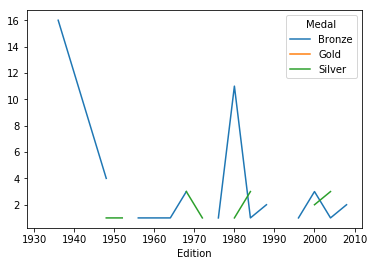

In [33]:
# Create the DataFrame: Mexico
mexico = medals[medals['NOC'] == 'MEX']
print(mexico)
# Group mexico by ['Edition', 'Medal'] and aggregate over 'Athlete'
mex_medals_by_year = mexico.groupby(['Edition','Medal'])['Athlete'].count()
print(mex_medals_by_year)
# Reshape mex_medals_by_year by unstacking
mex_medals_by_year = mex_medals_by_year.unstack(level='Medal')

# Plot the DataFrame mex_medals_by_year
mex_medals_by_year.plot()
plt.show()

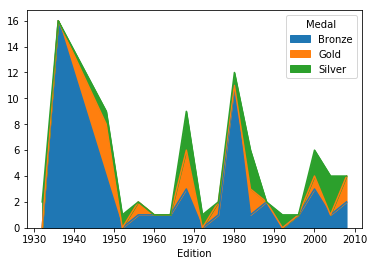

In [34]:
# Create the DataFrame: mexico
mexico = medals[medals.NOC == 'MEX']

# Group mex by 'Edition', 'Medal', and 'Athlete'
mex_medals_by_year = mexico.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape mex_medals_by_year by unstacking
mex_medals_by_year = mex_medals_by_year.unstack(level='Medal')

# Create an area plot of mex_medals_by_year
mex_medals_by_year.plot.area()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


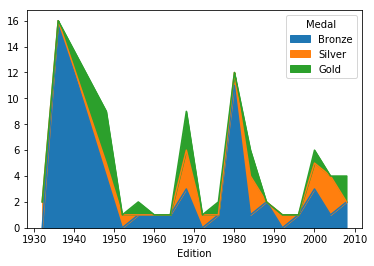

In [35]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories = ['Bronze','Silver','Gold'], ordered=True)
medals.info()
# Create the DataFrame: mexico
mexico = medals[medals.NOC == 'MEX']

# Group mexico by 'Edition', 'Medal', and 'Athlete'
mex_medals_by_year = mexico.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape mex_medals_by_year by unstacking
mex_medals_by_year = mex_medals_by_year.unstack(level='Medal')

# Create an area plot of mex_medals_by_year
mex_medals_by_year.plot.area()
plt.show()